## **DBSCAN Clustering**
### **Author:** Hansal Shah 

# **Importing required libraries**

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# **Loading the dataset**

In [ ]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# **DBSCAN algorithm from scratch**

In [ ]:
class dbscan:

  def __init__ (self, epsilon=2, minpts=15):
    self.epsilon = epsilon
    self.minpts = minpts
    self.clusters = []
    self.core_objects = []
    self.noise_objects = []

  def predict (self, X):
    self.X = np.array(X)
    self.samples, self.features = X.shape
    unvisited = list(range(self.samples))
    visited = []

    while len(unvisited):

      # Randomly selecting an unvisited object
      random_object = np.random.choice(unvisited, 1)[0]
      unvisited.remove(random_object)
      visited.append(random_object)

      # Finding the objects in epsilon neigbourhood
      epsilon_neighbourhood = self.find_epsilon_neighbours(random_object)

      if len(epsilon_neighbourhood) >= self.minpts:

        # Adding to core objects
        self.core_objects.append(random_object)

        # Creating a new cluster
        new_cluster = [random_object]
        while len(epsilon_neighbourhood):
          point = epsilon_neighbourhood.pop(0)

          if point in unvisited:
            unvisited.remove(point)
            visited.append(point)

            # Exploring the epsilon neigbourhood of the point
            point_neighbourhood = self.find_epsilon_neighbours(point)

            if len(point_neighbourhood) >= self.minpts:
              self.core_objects.append(point)
              for each in point_neighbourhood:
                epsilon_neighbourhood.append(each)
          
          # Adding the point to the cluster if not already a part of one
          if not self.is_cluster_member(point):
            new_cluster.append(point)

        self.clusters.append(new_cluster)

      else:
        # Adding to the noise objects
        self.noise_objects.append(random_object)

  def find_epsilon_neighbours(self, point):
    neighbours = []
    for i in range(self.samples):
      if i!=point:
        distance = self.euclidean_distance(self.X[point],self.X[i])
        if distance <= self.epsilon:
          neighbours.append(i)

    return neighbours

  def euclidean_distance(self, x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))  

  def is_cluster_member(self, point):
    included = False
    for cluster in self.clusters:
      if point in cluster:
        included = True
        break
    return included

  def plot(self):
    fig, ax = plt.subplots(figsize=(8,6))

    for i, index in enumerate(self.clusters):
      point = self.X[index].T
      ax.scatter(*point[0:2], s=15, label='Cluster '+str(i+1))
      ax.legend()
    
    ax.scatter(*(self.X[self.noise_objects].T)[0:2], color="black", s=30, linewidth=2, label='Noise')
    ax.legend()

    plt.show()

  def print_table(self):
    table = {'Point no.':[], 'Visited':[], 'Core':[], 'Cluster no.':[]}
    for _ in range(self.samples):
      table['Point no.'].append(_)
      table['Visited'].append(1)
      table
      
      if _ in self.core_objects:
        table['Core'].append(1)
      else:
        table['Core'].append(0)

      cluster_member = False
      for i in range(len(self.clusters)):
        if _ in self.clusters[i]:
          table['Cluster no.'].append(i+1)
          cluster_member = True
          break
      
      if not cluster_member:
        table['Cluster no.'].append('Noise')

    return pd.DataFrame.from_dict(table,)

# **Running the algorithm with user inputs**


Dataset: Iris Flower


Enter the value of epsilon for DBSCAN: 1

Enter the number of minimum points for DBSCAN: 15

The value of epsilon is 1.0 and the value of MinPts is 15.

The number of clusters found after running the algorithm is 2

Clusters are displayed below using color codes: 


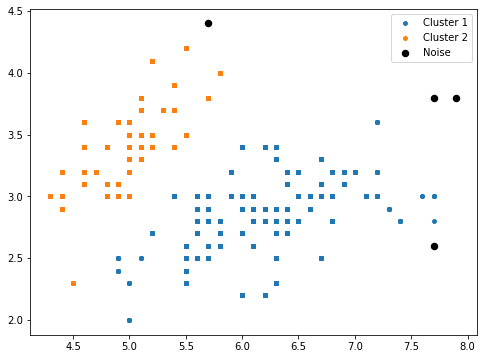

In [ ]:
print ('\nDataset: Iris Flower\n')

epsilon = float(input("\nEnter the value of epsilon for DBSCAN: "))
minpts = int(input('\nEnter the number of minimum points for DBSCAN: '))

print('\nThe value of epsilon is {} and the value of MinPts is {}.'.format(epsilon, minpts))

model = dbscan(epsilon,minpts)
model.predict(X)

print('\nThe number of clusters found after running the algorithm is {}'.format(len(model.clusters)))

print('\nClusters are displayed below using color codes: ')

model.plot()

# **Generating the table and saving it as a file**

In [ ]:
table = model.print_table()

table.to_csv('19BCP043_Table_DBSCAN.csv',index=False)

# Permanently changes the pandas settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
 
# All dataframes hereafter reflect these changes.
display(table)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if __name__ == '__main__':


,Point no.,Visited,Core,Cluster no.
0,0,1,1,2
1,1,1,1,2
2,2,1,1,2
3,3,1,1,2
4,4,1,1,2
5,5,1,1,2
6,6,1,1,2
7,7,1,1,2
8,8,1,1,2
9,9,1,1,2
